## Two-Mass Three-Spring System

![Diagram of two-mass three-spring system](two-mass-three-spring.svg)

In [1]:
# These commands get the notebook ready for plotting and calculations.
from IPython.display import Audio, display
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure.
#%matplotlib inline
%matplotlib nbagg
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [1]:
# These commands get the notebook ready to solve differential equations.
import sympy
from sympy import (cos, diff, dsolve, Eq, exp, Function, I, init_printing,
                   linsolve, Matrix, pi, simplify, sin, solveset, sqrt, Symbol,
                   symbols)
init_printing()

def get_symbol_from_expr(expr, name):
    for s in expr.atoms(Symbol):
        if s.name == name:
            return s
    raise ValueError("Did not find symbol with name '{0}' in expression."
                     .format(name))

def replace_symbols_in_expr(expr, external_symbols):
    """
    Replace the 'internal' symbols in an expression with symbols of the same
    name that are defined outside of the expression and can be shared
    between expressions.
    """
    for s in external_symbols:
        expr = expr.subs(get_symbol_from_expr(expr, s.name), s)
    return expr


Set up and solve the equations of motion for a two-mass three-spring system.

$x_1$ and $x_2$ are the displacements of masses $m_1$ and $m_2$ from their equilibrium position. (Note: We are assuming masses $m_1$ and $m_2$ are equal, for simplicity.)

The springs are modeled using [Hooke's Law](http://www.britannica.com/science/Hookes-law), each spring having a spring constant $k$. The natural length of each spring (neither compressed nor streteched) is $L$. The springs and masses are set up between two walls that are distance $3L$ apart.

In [3]:
# Two-mass three-spring system
m, k = symbols('m k', real=True, positive=True)
x1, x2 = symbols('x1 x2', function=True, real=True)
t = Symbol('t', real=True, nonnegative=True)

print("Force equation for m1:")
f1_expr_1 = -k*x1(t) - k*(x1(t) - x2(t))
f1_expr_2 = simplify(f1_expr_1)
eq1 = Eq(m * x1(t).diff(t, 2), f1_expr_2)
display(eq1)

print("Force equation for m2:")
f2_expr_1 = k*(x1(t) - x2(t)) - k*x2(t)
f2_expr_2 = simplify(f2_expr_1)
eq2 = Eq(m * x2(t).diff(t, 2), f2_expr_2)
display(eq2)

Force equation for m1:


Force equation for m2:


We'll solve the two coupled differential equations for $x_1(t)$ and $x_2(t)$. Unfortunately, sympy's ``dsolve`` function can't solve this sytem of equations in this form, so we'll have to perform some further transformations first.

In [4]:
a, b, c, d = symbols('a b c d', real=True, positive=True)

a_expr = -2 * k / m
b_expr = k / m
c_expr = k / m
d_expr = -2 * k / m
display(Eq(a, a_expr, evaluate=False))
display(Eq(b, b_expr, evaluate=False))
display(Eq(c, c_expr, evaluate=False))
display(Eq(d, d_expr, evaluate=False))

eq1_2 = Eq(x1(t).diff(t, 2), a*x1(t) + b*x2(t))
#display(eq1_2.subs({a: a_expr, b: b_expr}), (eq1/m1))
eq2_2 = Eq(x2(t).diff(t, 2), c*x1(t) + d*x2(t))
#display(eq2_2.subs({c: c_expr, d: d_expr}), (eq2/m1))
display(eq1_2, eq2_2)

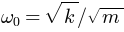

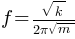

{m: 1, k: 40.0}


In [5]:
# You have to substitute in concrete values for all coefficients,
# or else dsolve() raises a PolynomialError. This is a bug in sympy.
omega0, f = symbols('omega0 f', real=True, positive=True)
omega0_expr = sqrt(k/m)
display(Eq(omega0, omega0_expr))
f_expr = omega0_expr / (2 * pi)
display(Eq(f, f_expr))

data = {m: 1, k: 40.0}
print(data)
display(Eq(f, f_expr.subs(data)).n())

system = (eq1_2.subs({a: a_expr.subs(data).n(), b: b_expr.subs(data)}),
          eq2_2.subs({c: c_expr.subs(data), d: d_expr.subs(data)}))
sol = dsolve(system)

C1, C2, C3, C4 = symbols('C1 C2 C3 C4')
x1_expr_c = replace_symbols_in_expr(sol[0].rhs, (C1, C2, C3, C4))
x2_expr_c = replace_symbols_in_expr(sol[1].rhs, (C1, C2, C3, C4))
display(Eq(x1(t), x1_expr_c))
display(Eq(x2(t), x2_expr_c))

v1, v2 = symbols('v1 v2', function=True, real=True)
v1_expr_c = x1_expr_c.diff(t)
v2_expr_c = x2_expr_c.diff(t)
display(Eq(v1(t), v1_expr_c))
display(Eq(v2(t), v2_expr_c))

Solve for the constants $C_1$, $C_2$, $C_3$, and $C_4$ using initial conditions at time $t = 0$.

In [6]:
x10, x20, v10, v20 = symbols('x10 x20 v10 v20', real=True)
x10_val, x20_val, v10_val, v20_val = 0.0, 0.0, 1.0, 0.0
initial_conditions = {x10: x10_val, x20: x20_val, v10: v10_val, v20: v20_val}
display("Initial conditions:", initial_conditions)
system = [
    Eq(x10_val, x1_expr_c.subs(t, 0)),
    Eq(x20_val, x2_expr_c.subs(t, 0)),
    Eq(v10_val, v1_expr_c.subs(t, 0)),
    Eq(v20_val, v2_expr_c.subs(t, 0))
]
for eq in system:
    display(eq)
sol = linsolve(system, (C1, C2, C3, C4))
assert len(sol) == 1

C1_expr, C2_expr, C3_expr, C4_expr = tuple(sol)[0]
display(Eq(C1, C1_expr, evaluate=False))
display(Eq(C2, C2_expr, evaluate=False))
display(Eq(C3, C3_expr, evaluate=False))
display(Eq(C4, C4_expr, evaluate=False))

consts = {C1: C1_expr, C2: C2_expr, C3: C3_expr, C4: C4_expr}
x1_expr_final = x1_expr_c.subs(consts)
x2_expr_final = x2_expr_c.subs(consts)
v1_expr_final = v1_expr_c.subs(consts)
v2_expr_final = v2_expr_c.subs(consts)
display(Eq(x1(t), x1_expr_final))
display(Eq(x2(t), x2_expr_final))
display(Eq(v1(t), v1_expr_final))
display(Eq(v2(t), v2_expr_final))

'Initial conditions:'

Sanity check:

In [7]:
display(Eq(x1(0), x1_expr_final.subs(t, 0)))
display(Eq(x2(0), x2_expr_final.subs(t, 0)))
display(Eq(v1(0), v1_expr_final.subs(t, 0)))
display(Eq(v2(0), v2_expr_final.subs(t, 0)))

display(data)

display(eq1)
eq1_check_lhs = (m * x1_expr_final.diff(t, 2)).subs(data)
eq1_check_rhs = (k*(-2*x1_expr_final + x2_expr_final)).subs(data)
display(Eq(eq1_check_lhs.expand(), eq1_check_rhs.expand()))

display(eq2)
eq2_check_lhs = (m * x2_expr_final.diff(t, 2)).subs(data)
eq2_check_rhs = (k*(x1_expr_final - 2*x2_expr_final)).subs(data)
display(Eq(eq2_check_lhs.expand(), eq2_check_rhs.expand()))

Now lets graph the results.

In [10]:
import cmath

def demo_two_mass_three_spring(sample_rate=100):
    # These equations assume:
    # m=1.0
    # k=40.0
    # x10=0.0, x20=0.0, v10=1.0, v20=0.0
    sqrt_10 = cmath.sqrt(10)
    sqrt_30 = cmath.sqrt(30)
    C1 = 0.000104166666666667 * sqrt_30 * 1.0j
    C2 = 0.0003125 * sqrt_10 * 1.0j
    C3 = -0.0003125 * sqrt_10 * 1.0j
    C4 = -0.000104166666666667 * sqrt_30 * 1.0j

    # Generate the samples
    time_duration = 5.0  # seconds
    t = np.linspace(0.0, time_duration, int(time_duration*sample_rate)+1)
    x1 = (
        40.0 * C1 * np.exp(-2 * sqrt_30 * 1.0j * t)
        + 40.0 * C2 * np.exp(-2 * sqrt_10 * 1.0j * t)
        + 40.0 * C3 * np.exp(2 * sqrt_10 * 1.0j * t)
        + 40.0 * C4 * np.exp(2 * sqrt_30 * 1.0j * t)
    )
    x2 = (
        -40.0 * C1 * np.exp(-2 * sqrt_30 * 1.0j * t)
        + 40.0 * C2 * np.exp(-2 * sqrt_10 * 1.0j * t)
        + 40.0 * C3 * np.exp(2 * sqrt_10 * 1.0j * t)
        -40.0 * C4 * np.exp(2 * sqrt_30 * 1.0j * t)
    )

    # Graph the samples
    fig = plt.figure()
    nrows, ncols = 2, 1
    #
    ax1 = fig.add_subplot(nrows, ncols, 1)
    ax1.set_title("Mass 1 position $x_1$ over time")
    ax1.set_xlabel("t")
    ax1.set_ylabel("$x_1$")
    ax1.plot(t, x1.real)
    #
    ax2 = fig.add_subplot(nrows, ncols, 2)
    ax2.set_title("Mass 2 position $x_2$ over time")
    ax2.set_xlabel("t")
    ax2.set_ylabel("$x_2$")
    ax2.plot(t, x2.real)
    #
    fig.tight_layout()
    plt.show()

demo_two_mass_three_spring(sample_rate=100)

<IPython.core.display.Javascript object>